In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

import seaborn as sns; sns.set()

# Working with perfectly Linear Dataset

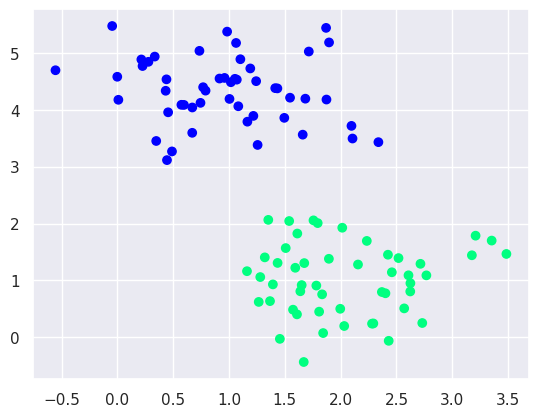

In [21]:
from sklearn.datasets  import make_blobs
x,y = make_blobs(n_samples=100,centers=2,random_state=0,
                 cluster_std=0.6,)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter')

In [ ]:
from sklearn.svm import SVC # support vector classifier
model = SVC(kernel='linear',C=1)
model.fit(x,y)

SVC(C=1, kernel='linear')

In [ ]:
x.shape

(50, 2)

In [ ]:
y.shape

(50,)

In [ ]:
def plot_svc_decision_function(model,ax=None,plot_support=True):
  """ Plot the decision function for a 2D SVC"""
  if ax is None:
    ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  # Create grid to evaluate model
  x = np.linspace(xlim[0],xlim[1],30)
  y = np.linspace(ylim[0],ylim[1],30)
  y,x = np.meshgrid(y,x)
  xy = np.vstack([x.ravel(),y.ravel()]).T
  p = model.decision_function(xy).reshape(x.shape)

  # plot decision boundary and margins
  ax.contour(x,y,p,colors='k',
             levels=[-1,0,1],alpha=0.5,
             linestyles=['--','-','--'])
  
  # plot support vectors
  if plot_support:
    ax.scatter(model.support_vectors_[:,0],
               model.support_vectors_[:,1],
               s=300, linewidth=1,facecolors='none');
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

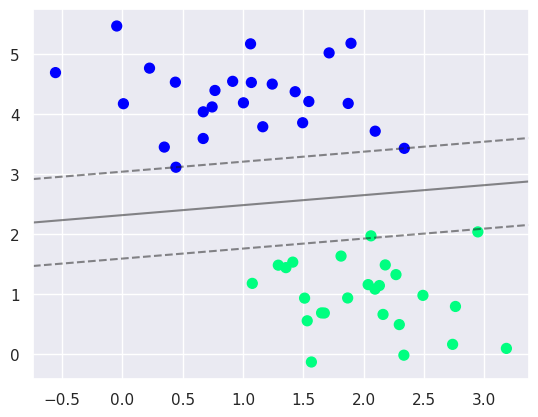

In [ ]:
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='winter')
plot_svc_decision_function(model);


# Working with Almost Linearly separable dataset

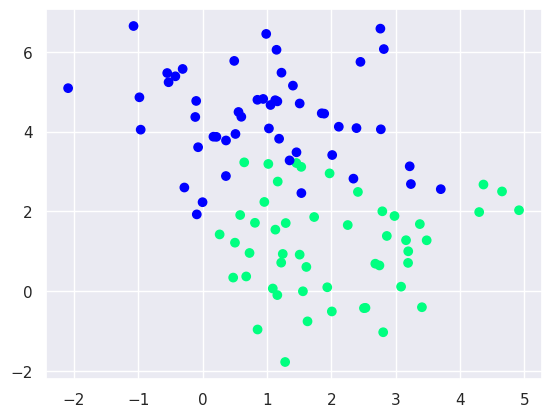

In [22]:
x,y = make_blobs(n_samples=100,centers=2,random_state=0,
                 cluster_std=1.2,)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter')

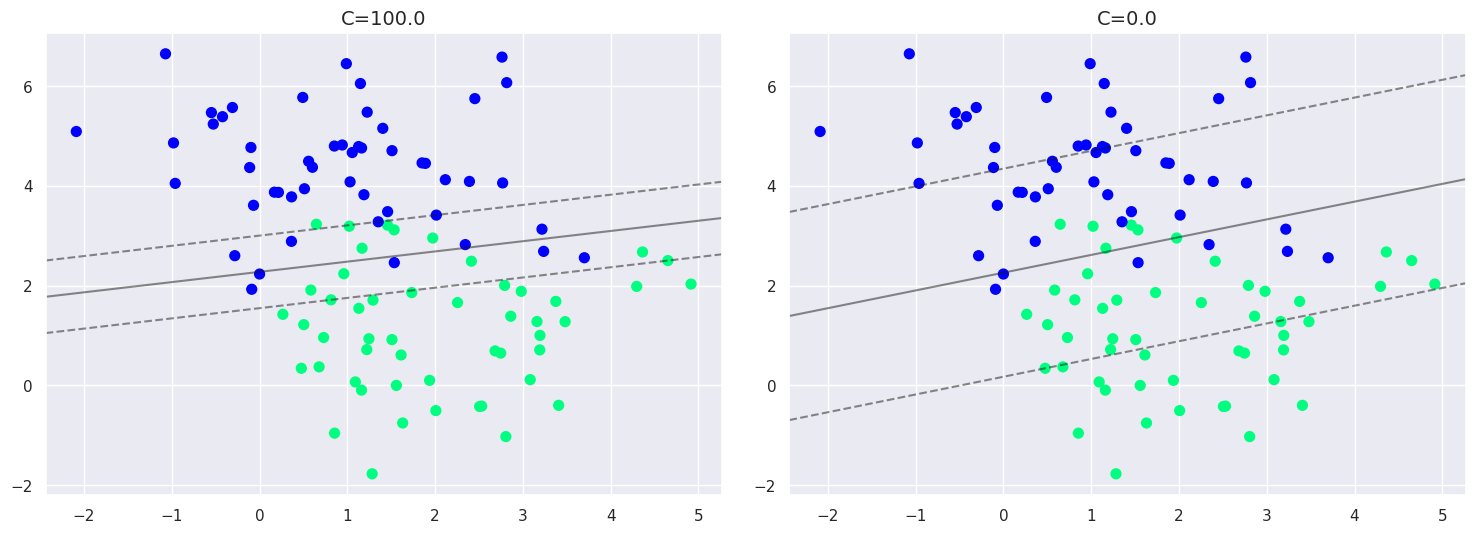

In [23]:
fig,ax = plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.1)

for axi,C in zip(ax,[100.0,0.01]):
  model = SVC(kernel='linear',C=C).fit(x,y)
  axi.scatter(x[:,0],x[:,1],c=y,s=50,cmap='winter')
  plot_svc_decision_function(model,axi)
  axi.scatter(model.support_vectors_[:,0],
              model.support_vectors_[:,1],
              s=300,lw=1,facecolors='none');
  axi.set_title('C={0:.1f}'.format(C),size=14)